In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("results/PTSD_cognet_test.joblib")

In [4]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,4,2,5,4,2,3,2,3,3,2,...,2,4,4,3,2,3,2,2,4,2
1,3,2,3,3,1,3,2,2,2,1,...,3,4,4,3,3,3,4,3,4,5
2,2,2,2,4,1,3,3,2,2,4,...,4,2,2,4,4,2,3,2,2,5
3,2,2,5,1,3,2,1,2,2,1,...,1,2,3,3,3,2,1,1,2,2
4,4,1,1,1,2,2,1,1,1,2,...,2,2,2,2,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,2,3,4,1,1,1,1,3,2,...,2,2,2,2,2,2,2,2,2,3
300,5,2,2,4,4,3,2,5,4,4,...,5,5,5,5,4,5,5,4,4,5
301,5,1,2,1,1,3,5,5,3,4,...,4,3,3,2,3,1,3,2,5,5
302,2,1,3,3,1,2,2,2,1,1,...,1,1,1,1,1,2,2,2,2,2


# Compute dissonance and random mask reconstruction for Qnet samples

In [5]:
# compute dissonance matrix of qnet samples
cognet_obj.set_nsamples(304)
cognet_obj.MAX_PROCESSES = 11
return_dict = cognet_obj.dissonance_matrix(outfile="mpi_tmp/PTSD_dissonance_matrix.csv", processes=2)
return_dict
qnet_dissonance_df=pd.DataFrame(return_dict.copy())

# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
cognet_obj.steps = 1000
qnet_randommask_df = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=True)
qnet_randommask_df

The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304
___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304


,rederr,r_prob,rand_err,mask_,sample,qsampled,random_sample
0,47.983468,0.219725,0.390267,"[ptsd1, ptsd2, ptsd6, ptsd9, ptsd10, ptsd12, p...","[4, 2, 5, 4, 2, 3, 2, 3, 3, 2, 3, 2, 4, 3, 3, ...","[5, 2, 5, 4, 2, 4, 2, 3, , 3, 3, 2, 4, , 2, 4,...","[3, 3, 5, 4, 2, 1, 2, 3, 1, 4, 3, 1, 4, 1, 2, ..."
1,49.745293,0.218692,0.426776,"[ptsd2, ptsd4, ptsd5, ptsd8, ptsd9, ptsd10, pt...","[3, 2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, ...","[3, , 3, 4, , 3, 2, 1, 2, 4, 3, 1, 2, 2, , 3, ...","[3, 1, 3, 3, 4, 3, 2, 1, 3, 4, 3, 1, 5, 2, 4, ..."
2,47.314416,0.219545,0.385422,"[ptsd3, ptsd5, ptsd9, ptsd10, ptsd11, ptsd12, ...","[2, 2, 2, 4, 1, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, ...","[2, 2, , 4, 1, 3, 3, 2, , , 3, 4, 3, 1, 3, 2, ...","[2, 2, 3, 4, 3, 3, 3, 2, 1, 4, 4, 1, 3, 1, 3, ..."
3,33.253663,0.219307,0.435569,"[ptsd3, ptsd4, ptsd6, ptsd11, ptsd13, ptsd14, ...","[2, 2, 5, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, ...","[2, 2, 1, 4, 3, , 1, 2, 2, 1, , 3, 3, 1, 1, 1,...","[2, 2, 3, 3, 3, 1, 1, 2, 2, 1, 4, 3, 3, 1, 2, ..."
4,44.786620,0.217619,0.454999,"[ptsd1, ptsd3, ptsd7, ptsd8, ptsd10, ptsd11, p...","[4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, ...","[5, 1, 2, 1, 2, 2, 4, , 1, 2, 1, 1, 2, 3, 1, 1...","[3, 1, 1, 1, 2, 2, 1, 3, 1, 4, 3, 1, 5, 3, 4, ..."
...,...,...,...,...,...,...,...
299,47.231152,0.219474,0.401787,"[ptsd1, ptsd5, ptsd7, ptsd9, ptsd12, ptsd13, p...","[4, 2, 3, 4, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, ...","[5, 2, 3, 4, 3, 1, 1, 1, 5, 2, 1, 1, 2, 2, 2, ...","[3, 2, 3, 4, 3, 1, 1, 1, 1, 2, 1, 4, 3, 1, 2, ..."
300,38.105005,0.220952,0.380160,"[ptsd2, ptsd3, ptsd4, ptsd6, ptsd8, ptsd10, pt...","[5, 2, 2, 4, 4, 3, 2, 5, 4, 4, 4, 3, 4, 5, 5, ...","[5, 1, 2, 4, 4, 5, 2, 3, 4, 2, 4, 2, 4, 5, 5, ...","[5, 1, 1, 4, 4, 3, 2, 1, 4, 3, 4, 4, 4, 5, 5, ..."
301,51.725230,0.217672,0.419709,"[ptsd1, ptsd2, ptsd7, ptsd8, ptsd9, ptsd11, pt...","[5, 1, 2, 1, 1, 3, 5, 5, 3, 4, 2, 2, 3, 3, 4, ...","[, 1, 2, 1, 1, 3, , , 2, 4, 1, , 3, 3, 1, 4, 2...","[3, 3, 2, 1, 1, 3, 1, 1, 3, 4, 4, 3, 3, 3, 5, ..."
302,41.200935,0.215686,0.422376,"[ptsd2, ptsd3, ptsd4, ptsd7, ptsd8, ptsd10, pt...","[2, 1, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, ...","[2, 1, 5, 4, 1, 2, 5, 3, 1, 2, 2, 2, 2, 2, 2, ...","[2, 1, 1, 4, 1, 2, 3, 1, 1, 3, 2, 2, 5, 4, 2, ..."


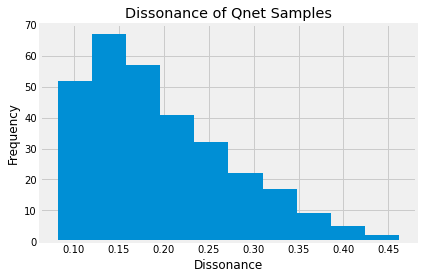

In [6]:
qnet_dissonance_df.mean(axis=1).hist()
plt.title("Dissonance of Qnet Samples")
plt.xlabel("Dissonance")
plt.ylabel("Frequency")
plt.show()

In [7]:
cognet_obj.steps = 200
# computing random mask reconstruction of qnet samples
print("___________________________________________________")
cognet_obj.set_nsamples(304)
qnet_randommask_df_200step = cognet_obj.randomMaskReconstruction_multiple('results/PTSD_randomMaskRecon_test.csv',  save_samples=False)
qnet_randommask_df_200step

___________________________________________________
The number of selected samples (304) is equal to the number of samples (304)!
The number of samples have been set to 304


,rederr,r_prob,rand_err,mask_
0,50.190968,0.216818,0.373434,"[ptsd2, ptsd4, ptsd7, ptsd8, ptsd9, ptsd13, pt..."
1,56.180205,0.217857,0.417455,"[ptsd6, ptsd9, ptsd11, ptsd13, ptsd14, ptsd15,..."
2,40.258536,0.221649,0.397109,"[ptsd1, ptsd5, ptsd8, ptsd15, ptsd16, ptsd17, ..."
3,43.615003,0.218696,0.440825,"[ptsd1, ptsd2, ptsd3, ptsd4, ptsd5, ptsd9, pts..."
4,35.755325,0.219811,0.431275,"[ptsd1, ptsd4, ptsd13, ptsd15, ptsd18, ptsd20,..."
...,...,...,...,...
299,55.136410,0.218584,0.395707,"[ptsd3, ptsd4, ptsd6, ptsd7, ptsd9, ptsd10, pt..."
300,49.506681,0.215487,0.382734,"[ptsd2, ptsd4, ptsd9, ptsd11, ptsd12, ptsd13, ..."
301,56.675080,0.219811,0.413625,"[ptsd1, ptsd4, ptsd10, ptsd11, ptsd12, ptsd14,..."
302,43.958535,0.217593,0.435043,"[ptsd1, ptsd4, ptsd7, ptsd8, ptsd13, ptsd16, p..."


In [8]:
# redefine the reconstruction error for PTSD
samples=[]
for s in qnet_randommask_df['sample']:
    samples.append(list(s))
qnet_randommask_samples=pd.DataFrame(data=samples, columns=features, dtype='int').astype(int)
qnet_randommask_samples

qsamples=[]
for s in qnet_randommask_df['qsampled']:
    qsamples.append(list(s))
qnet_randommask_qsamples=pd.DataFrame(data=qsamples, columns=features, dtype='int').replace('',0).astype(int)

In [9]:
# calculate the recon error
diff_df = qnet_randommask_samples - qnet_randommask_qsamples
diff_df1 = diff_df.copy()
diff_df["diff sum"] = diff_df.sum(axis=1)
num_masked = pd.DataFrame([len(list(s)) for s in qnet_randommask_df['mask_']], columns=["num masked"])
diff_df["num masked"] = num_masked
diff_df["recon_results"] = diff_df["diff sum"] / diff_df["num masked"]

# add PTSD indicator
PTSD_indicator = pd.read_csv("data/PTSD_cognet_test.csv")[["PTSDDx"]]

print(diff_df1[PTSD_indicator["PTSDDx"] == 0].mean().mean(),diff_df1[PTSD_indicator["PTSDDx"] == 1].mean().mean())

0.02265315883299274 0.47487049487490346


In [10]:
diff_df1[PTSD_indicator["PTSDDx"] == 0]

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,-1,0,0,0,0,-1,0,0,3,-1,...,0,3,1,-1,0,0,0,-2,4,0
1,0,2,0,-1,1,0,0,1,0,-3,...,0,1,1,0,-1,0,0,0,0,0
2,0,0,2,0,0,0,0,0,2,4,...,0,0,0,0,0,0,-1,0,2,0
3,0,0,4,-3,0,2,0,0,0,0,...,0,0,1,1,0,0,0,-3,0,2
4,-1,0,-1,0,0,0,-3,1,0,0,...,0,0,0,-2,0,-3,-1,0,-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-3,-1,0,0,-1,-2,0,1,0,-3,...,0,0,0,0,-2,-1,2,0,0,0
298,-2,-1,1,1,0,0,1,0,1,-2,...,0,0,0,0,2,-2,0,1,-2,5
301,5,0,0,0,0,0,5,5,1,0,...,2,0,-1,2,0,0,0,0,0,0
302,0,0,-2,-1,0,0,-3,-1,0,-1,...,0,0,0,-1,0,0,2,0,-1,2


In [11]:
diff_df1[PTSD_indicator["PTSDDx"] == 1]

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
5,1,0,1,-3,0,0,0,0,-1,-2,...,0,-1,1,0,-1,-1,1,0,0,0
8,0,0,0,0,0,3,0,0,0,0,...,1,-2,1,0,0,0,0,0,0,5
9,4,0,0,0,0,5,0,5,0,0,...,4,0,0,0,0,1,0,1,5,0
11,0,0,0,2,0,0,0,0,-2,2,...,3,1,0,0,0,0,0,0,0,4
14,0,0,-1,2,0,0,4,1,0,0,...,0,0,3,1,2,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,1,1,0,4,0,1,1,...,0,3,3,3,0,2,4,0,0,0
293,-2,0,-2,-1,0,0,0,-1,0,0,...,3,0,2,4,0,0,1,0,1,4
296,0,0,-3,0,0,0,0,-1,1,0,...,1,0,0,0,0,0,0,0,0,5
299,-1,0,0,0,-2,0,0,0,-2,0,...,0,0,0,2,0,0,0,0,-1,3


In [12]:
len(diff_df1[PTSD_indicator["PTSDDx"] == 1])

86

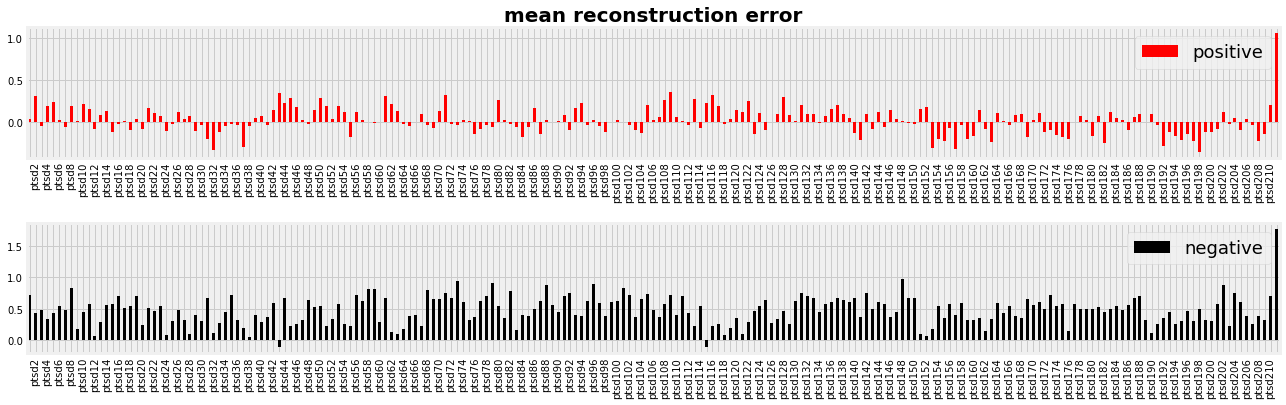

In [13]:
# plot the recon error grouped by PTSD indicator
plt.figure(figsize=[20,6])
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=.5)
diff_df1[PTSD_indicator["PTSDDx"] == 0].mean().plot(kind='bar',color='r')
ax0=plt.gca()

plt.subplot(2,1,2)
diff_df1[PTSD_indicator["PTSDDx"] == 1].mean().plot(kind='bar',color='k')
ax=plt.gca()

[label.set_visible(False) for x in [ax, ax0] for label in x.xaxis.get_ticklabels()[::2]]
ax0.set_title('mean reconstruction error',fontsize=20,fontweight='bold')
ax0.legend(['positive'],fontsize=18)
ax.legend(['negative'],fontsize=18)

# plt.gca().set_xlabel('')
# diff_df1.mean().plot(kind="bar")
# ax=plt.gca()
# [label.set_visible(False) for label in ax.xaxis.get_ticklabels()[::2]]
# ax.set_title('mean reconstruction error',fontsize=15,fontweight='bold')

# Drawing Random Samples from Uniform Distribution

In [14]:
print("__________________________________________________")
n = 304
print("{} random samples computed".format(n))
usamples = cognet_obj.random_sample(type="uniform",n=n, n_jobs=3)
results = []
for s in range(len(usamples)):
    results.append(cognet_obj.dissonance(0, sample=usamples.iloc[s]))
urandom_dissonance_df = pd.DataFrame(results)
urandom_dissonance_df

__________________________________________________
304 random samples computed


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,0.500455,0.898250,0.178298,0.441309,0.884543,0.622525,0.814992,0.415397,0.198996,0.000000,...,0.463539,0.000000,0.000000,0.629744,0.332215,0.000000,0.000000,0.471621,0.198430,0.036395
1,0.253515,0.970983,0.197007,0.332280,0.000000,0.435831,0.819274,0.000000,0.591728,0.244326,...,0.434572,0.813060,0.743608,0.596577,0.000000,0.000000,0.428292,0.458225,0.899519,0.516341
2,0.267690,0.000000,0.779556,0.501395,0.880943,0.815962,0.000000,0.791565,0.000000,0.000000,...,0.000000,0.125125,0.360110,0.000000,0.650954,0.214238,0.599732,0.407807,0.000000,0.742397
3,0.503697,0.539016,0.395153,0.404937,0.882664,0.747928,0.816232,0.589290,0.757830,0.027166,...,0.802955,0.706217,0.564226,0.244866,0.000000,0.745929,0.364957,0.000000,0.772574,0.123311
4,0.298232,0.898332,0.315429,0.423685,0.840511,0.000000,0.295811,0.824819,0.820573,0.000000,...,0.418084,0.495332,0.600051,0.210331,0.394359,0.742129,0.285654,0.437779,0.923246,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.258852,0.953209,0.000000,0.294847,0.000000,0.818621,0.454744,0.233438,0.386840,0.000000,...,0.726516,0.243973,0.441806,0.000000,0.000000,0.000000,0.539121,0.000000,0.000000,0.000000
300,0.405510,0.569872,0.280869,0.395960,0.875864,0.082590,0.838585,0.000000,0.134304,0.048528,...,0.000000,0.233903,0.215511,0.296115,0.347193,0.867835,0.376137,0.646561,0.145891,0.000000
301,0.337671,0.912260,0.276372,0.441495,0.847253,0.807810,0.418272,0.844893,0.000000,0.000000,...,0.666023,0.239143,0.541391,0.335373,0.449076,0.764752,0.397949,0.406743,0.000000,0.540355
302,0.593822,0.571784,0.183972,0.000000,0.821130,0.000000,0.000000,0.477806,0.000000,0.216938,...,0.199397,0.769780,0.569050,0.280470,0.000000,0.695554,0.747789,0.454160,0.513091,0.165227


Uniform Random Sampling Threshold (90%):  0.3738391317063762
Uniform Random Sampling Threshold (95%):  0.36722599486233637


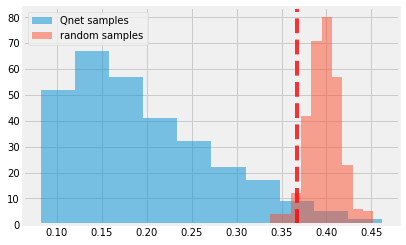

In [15]:
# find confidence interval for random samples drawn from uniform distributions
qnet_mean = urandom_dissonance_df.mean(axis=1).mean()
qnet_std = urandom_dissonance_df.mean(axis=1).std(ddof=1)
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 1-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
threshold_p1=(-z_crit*qnet_std)+qnet_mean

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
threshold_p05=(-z_crit*qnet_std)+qnet_mean

print('Uniform Random Sampling Threshold (90%): ',threshold_p1)
print('Uniform Random Sampling Threshold (95%): ',threshold_p05)

plt.figure()
udissonance_df = pd.DataFrame(data=qnet_dissonance_df.mean(axis=1), columns=["Qnet"])
udissonance_df["random"] = urandom_dissonance_df.mean(axis=1)
plt.hist(udissonance_df["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(udissonance_df["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(threshold_p05, color="red", linestyle="--", alpha=.8)
plt.show()

# Comparing Positive vs Negative PTSD dissonance and reconstruction results

<AxesSubplot:xlabel='Mean Dissonance', ylabel='Mean Reconstruction'>

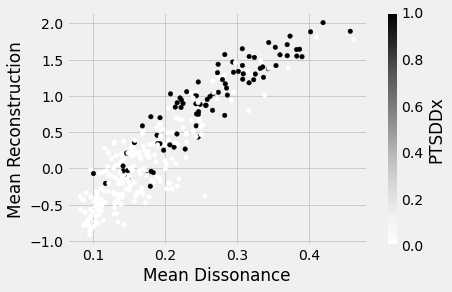

In [16]:
# getting positive and negative PTSD samples and merging with dissonance and reconstruction results
PTSD_DATA = pd.read_csv("data/PTSD_cognet_test.csv")[["PTSDDx"]]

PTSD_DATA["Mean Reconstruction"] = diff_df["recon_results"] # qnet_randommask_df["rederr"]
PTSD_DATA["Mean Dissonance"] = qnet_dissonance_df.mean(axis=1)

plt.style.use('fivethirtyeight')
PTSD_DATA.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="PTSDDx")

[(-3.0, 3.0)]

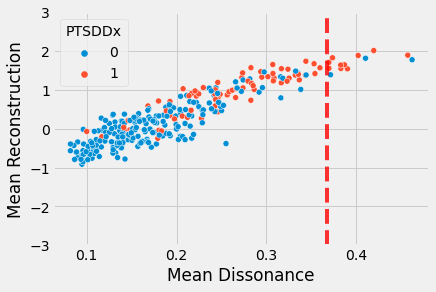

In [17]:
# plotting negative vs postive PTSD samples
#random_mask_dissonance_df.plot.scatter("Mean Dissonance", "Mean Reconstruction", c="actual")
plt.axvline(threshold_p05, color="red", linestyle="--", alpha=.8)
sns.scatterplot(PTSD_DATA["Mean Dissonance"],
                PTSD_DATA["Mean Reconstruction"],
                hue=PTSD_DATA["PTSDDx"]).set(ylim=(-3, 3))

In [18]:
print("Number of negative PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05) & (PTSD_DATA["PTSDDx"] == 0)]["Mean Dissonance"]))
print("Number of positive PTSD results that are 'suspect' at alpha level of .05:", len(PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05) & (PTSD_DATA["PTSDDx"] == 1)]["Mean Dissonance"]))

Number of negative PTSD results that are 'suspect' at alpha level of .05: 3
Number of positive PTSD results that are 'suspect' at alpha level of .05: 10


In [19]:
PTSD_DATA[(PTSD_DATA["Mean Dissonance"] >= threshold_p05)]

,PTSDDx,Mean Reconstruction,Mean Dissonance
9,1,1.705882,0.369462
60,1,2.009174,0.419398
63,1,1.539216,0.390101
86,1,1.553191,0.369530
98,1,1.882353,0.402023
159,1,1.822917,0.373479
188,1,1.548077,0.382831
210,0,1.811321,0.410215
221,1,1.642202,0.386804
222,0,1.385965,0.371270
